In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse

mapping = {0: "Least Squares", 1: "Lasso", 2:"Ridge", 3:"Elastic Net"}

index = np.linspace(1, 24, 24)
X = np.zeros((24, 11))

for i in range(11):
    X[:, i] = np.power(index, i)

def corrupt(arr, num_corrupt):
    corr_arr = arr.copy()
    uwu = np.random.choice(24, num_corrupt)
    for x in uwu:
        corr_arr[x] = 0

    return corr_arr

def generate_models(y):
    least_squares = linear_model.LinearRegression().fit(X, y)
    lasso = linear_model.Lasso().fit(X, y)
    ridge = linear_model.Ridge().fit(X, y)
    elastic = linear_model.ElasticNet().fit(X, y)

    return pd.DataFrame(data=[least_squares, lasso, ridge, elastic]).T.rename(columns=mapping),\
           pd.DataFrame(data=[least_squares.coef_, lasso.coef_, ridge.coef_, elastic.coef_]).T.rename(columns=mapping)


def generate_predictions(y, linear_models):
    least_squares_pred = linear_models["Least Squares"][0].predict(X)
    lasso_pred = linear_models["Lasso"][0].predict(X)
    ridge_pred = linear_models["Ridge"][0].predict(X)
    elastic_pred = linear_models["Elastic Net"][0].predict(X)

    return pd.DataFrame(data=[least_squares_pred, lasso_pred, ridge_pred, elastic_pred]).T.rename(columns=mapping), \
           pd.DataFrame(data=[mse(y, least_squares_pred), mse(y, lasso_pred), mse(y, ridge_pred), mse(y, elastic_pred)]).T.rename(columns=mapping)


<h1>Temperature Data</h1>

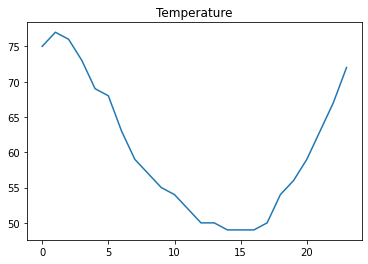

In [3]:
temp = np.array([75,77,76,73,69,68,63,59,57,55,54,52,50,50,49,49,49,50,54,56,59,63,67,72])

plt.plot(temp)
plt.title("Temperature")
plt.show()

In [4]:
models, coefficients = generate_models(temp)
predictions, errors = generate_predictions(temp, models)

In [5]:
predictions

,Least Squares,Lasso,Ridge,Elastic Net
0,74.980834,75.672763,75.729830,76.059864
1,77.190889,74.813551,76.136693,75.043279
2,75.578633,73.458753,75.492902,73.556431
3,73.034617,71.676952,73.464311,71.668479
4,70.015444,69.541680,70.293163,69.453032
5,66.588873,67.131536,66.550338,66.988210
6,63.017635,64.530220,62.845116,64.356604
7,59.700666,61.826434,59.614290,61.645120
8,56.953602,59.113603,57.033923,58.944634
9,54.865040,56.489334,55.044973,56.349423


In [6]:
coefficients

,Least Squares,Lasso,Ridge,Elastic Net
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2.989706e+01,-0.000000e+00,3.241997e-01,-1.934075e-01
2,-1.894137e+01,-3.095035e-01,3.704667e-01,-2.980290e-01
3,6.309327e+00,9.504506e-03,-7.091638e-02,9.765975e-03
4,-1.297824e+00,1.803915e-04,-6.997972e-02,1.665940e-04
5,1.689235e-01,1.991129e-06,2.143311e-02,1.608444e-06
6,-1.406527e-02,-1.054194e-08,-2.667418e-03,-1.849481e-08
7,7.450447e-04,-1.762444e-09,1.782699e-04,-1.822955e-09
8,-2.424469e-05,-8.244823e-11,-6.718712e-06,-7.691089e-11
9,4.414467e-07,-3.033693e-12,1.348149e-07,-2.580946e-12


In [7]:
errors

,Least Squares,Lasso,Ridge,Elastic Net
0,0.278469,1.533217,0.361983,1.373144


<h1>Corrupted Temperature Data</h1>

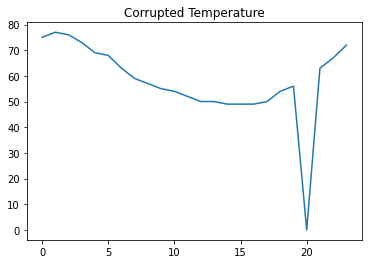

In [8]:
corr_temp = corrupt(temp, 1)

plt.plot(corr_temp)
plt.title("Corrupted Temperature")
plt.show()

In [9]:
corr_model, corr_coefficients = generate_models(corr_temp)
corr_predictions, corr_errors = generate_predictions(temp, corr_model)

In [10]:
corr_predictions

,Least Squares,Lasso,Ridge,Elastic Net
0,74.858032,77.672505,74.199505,76.452162
1,78.431071,75.128784,76.264960,74.505489
2,74.027049,72.584892,77.278027,72.412340
3,72.682938,70.087687,75.001355,70.235674
4,71.248583,67.677995,70.100075,68.032809
5,67.453340,65.388805,64.783303,65.853535
6,62.312829,63.243334,60.945779,63.738051
7,58.067201,61.253102,59.103261,61.714894
8,55.952115,59.416221,58.405006,59.799026
9,55.436677,57.716243,57.418393,57.990437


In [11]:
corr_coefficients

,Least Squares,Lasso,Ridge,Elastic Net
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.665888e+02,-2.448633e+00,-8.517265e-01,-1.603569e+00
2,-1.298944e+02,-5.280530e-02,-6.139719e-01,-1.413743e-01
3,5.172843e+01,9.252363e-03,2.417510e+00,1.173327e-02
4,-1.199332e+01,-7.653651e-05,-1.285422e+00,-5.445375e-05
5,1.717232e+00,-8.779317e-06,2.931759e-01,-8.949466e-06
6,-1.560472e-01,-2.890684e-07,-3.605392e-02,-3.062832e-07
7,9.000001e-03,-4.399494e-09,2.573233e-03,-5.010211e-09
8,-3.186098e-04,1.470041e-10,-1.066728e-04,1.320076e-10
9,6.305289e-06,1.727226e-11,2.382783e-06,1.709243e-11


In [12]:
corr_errors

,Least Squares,Lasso,Ridge,Elastic Net
0,69.007056,38.340523,66.250951,38.026379


As we can see, when we have an outlier data point, Lasso and Elastic Net significantly reduce the error due to added bias. Ridge also reduces the error, but not as much as Lasso and elastic net.

<h1>Variance</h1>

In [13]:
linear_coef = []
lasso_coef = []
ridge_coef = []
elastic_coef = []

for r in range(11):
    linear_coef.append([])
    lasso_coef.append([])
    ridge_coef.append([])
    elastic_coef.append([])

for attempt in range(10):
    corr_temp = corrupt(temp, 3)
    corr_coefficients = generate_models(corr_temp)[1]

    for r in range(11):
        linear_coef[r].append(corr_coefficients["Least Squares"][r])
        lasso_coef[r].append(corr_coefficients["Lasso"][r])
        ridge_coef[r].append(corr_coefficients["Ridge"][r])
        elastic_coef[r].append(corr_coefficients["Elastic Net"][r])

The variance for the loadings of least squares regression:

In [14]:
for r in range(11):
    print("Variance for Coefficient #" + str(r) + ":\t\t" + str(np.var(linear_coef[r])))

Variance for Coefficient #0:		0.0
Variance for Coefficient #1:		288686.2618440877
Variance for Coefficient #2:		117080.26269824439
Variance for Coefficient #3:		12974.744292302394
Variance for Coefficient #4:		509.530258979146
Variance for Coefficient #5:		8.018693692770615
Variance for Coefficient #6:		0.05310423686861958
Variance for Coefficient #7:		0.00014677555403320856
Variance for Coefficient #8:		1.5716759048218355e-07
Variance for Coefficient #9:		5.376898936849649e-11
Variance for Coefficient #10:		3.4223080712357476e-15


The variance for the loadings of lasso regression:

In [15]:
for r in range(11):
    print("Variance for Coefficient #" + str(r) + ":\t\t" + str(np.var(lasso_coef[r])))

Variance for Coefficient #0:		0.0
Variance for Coefficient #1:		14.607871056063818
Variance for Coefficient #2:		0.06996521009150225
Variance for Coefficient #3:		5.224494300286004e-05
Variance for Coefficient #4:		4.8806619702040186e-08
Variance for Coefficient #5:		9.64348264397396e-11
Variance for Coefficient #6:		7.847840505031847e-14
Variance for Coefficient #7:		2.7405047354619917e-17
Variance for Coefficient #8:		3.5828559328731727e-20
Variance for Coefficient #9:		2.697707509278405e-22
Variance for Coefficient #10:		1.0509439082741233e-24


The variance for the loadings of ridge regression:

In [16]:
for r in range(11):
    print("Variance for Coefficient #" + str(r) + ":\t\t" + str(np.var(ridge_coef[r])))

Variance for Coefficient #0:		0.0
Variance for Coefficient #1:		48.91772339634548
Variance for Coefficient #2:		62.80107177935965
Variance for Coefficient #3:		23.89692766304264
Variance for Coefficient #4:		4.370256214062166
Variance for Coefficient #5:		0.20007992289859233
Variance for Coefficient #6:		0.0026861864713960226
Variance for Coefficient #7:		1.2113068048251356e-05
Variance for Coefficient #8:		1.8484494968404693e-08
Variance for Coefficient #9:		8.250206477415283e-12
Variance for Coefficient #10:		6.451821492156242e-16


The variance for the loadings of elastic net regression:

In [17]:
for r in range(11):
    print("Variance for Coefficient #" + str(r) + ":\t\t" + str(np.var(elastic_coef[r])))

Variance for Coefficient #0:		0.0
Variance for Coefficient #1:		4.789324007979637
Variance for Coefficient #2:		0.025116120550699794
Variance for Coefficient #3:		9.225622437799752e-05
Variance for Coefficient #4:		3.588475061910704e-08
Variance for Coefficient #5:		9.995764596931019e-11
Variance for Coefficient #6:		8.960150364580476e-14
Variance for Coefficient #7:		3.2499583636657845e-17
Variance for Coefficient #8:		2.96828316464521e-20
Variance for Coefficient #9:		2.592842000332687e-22
Variance for Coefficient #10:		1.0587642858160137e-24


So as we can see, normal least squares has a huge amount of variance, but since the models with regularlization has the added bias to be more robust toward outliers, there is less variance.